# Naive Bayes Klassifikator
Als einführendes Beispiel wollen wir mit Hilfe des Naive-Bayes Klassifikators Obsorten, Äpfel und Birnen, andhand des Gewichts und Zuckergehalts klassifizieren.

Wir laden die Daten in ein Dataframe: Zuckergehalt und Gewicht von Äpfeln und Birnen:

In [15]:
import pandas as pd

url="https://raw.githubusercontent.com/troescherw/datasets/master/obst.csv"
df = pd.read_csv(url, delimiter=";")
df

,Zuckergehalt,Gewicht,Obstsorte
0,12.0,112,Apfel
1,10.0,100,Apfel
2,9.0,120,Apfel
3,12.0,119,Apfel
4,11.0,115,Apfel
5,13.0,113,Apfel
6,12.0,114,Apfel
7,15.0,150,Birne
8,16.0,149,Birne
9,14.0,147,Birne


Das Feature *Obstsorte* ist nominal skaliert. Deshalb ersetzen wir die String-Wert durch Dummys (One-Hot-Encoding):

**0** steht nun für **Apfel**, **1** für **Birne**. Beim **Naive Bayes Klassifikator** ist es übrigens nicht zwingend erforderlich (wie bei OLS), eine Kategorie zu entfernen, hab´s hier aber dennoch mal durchgeführt. Wir können nun unser Modell erstellen.

In [16]:
from sklearn.naive_bayes import GaussianNB

X = df[["Zuckergehalt", "Gewicht"]]
y = df.Obstsorte
model = GaussianNB().fit(X,y)

Mit Hilfe des Modells können wir nun zwei "unbekannte" Obststücke klassifiziert werden. Haben wir ein Stück Obst, das z.B. ein Zuckergehalt von 52,5g und ein Gewicht von 125g verfügt, fragen wir das Modell, ob es sich um einen Apfel oder eine Birne handelt:

In [18]:
unbekanntesObst = pd.DataFrame({"Zuckergehalt": [11.5], "Gewicht":[110]})
model.predict(unbekanntesObst)

array(['Apfel'], dtype='<U5')

Das Modell gibt eine **0** zurück, damit handelt es sich um einen Apfel. Wir erstellen ein Scatterplot und fügen dort auch das unbekannte Stück Obst ein:

[]

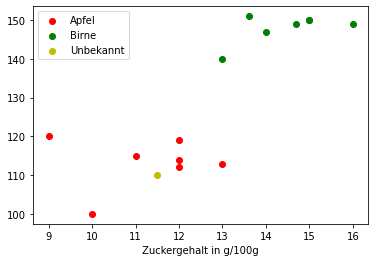

In [19]:
import matplotlib.pyplot as plt

plt.scatter(df[df.Obstsorte=="Apfel"].Zuckergehalt, df[df.Obstsorte=="Apfel"].Gewicht, c="r", label="Apfel")
plt.scatter(df[df.Obstsorte=="Birne"].Zuckergehalt, df[df.Obstsorte=="Birne"].Gewicht, c="g", label="Birne")
plt.scatter(unbekanntesObst.Zuckergehalt, unbekanntesObst.Gewicht, c="y", label="Unbekannt")
plt.xlabel("Zuckergehalt in g/100g")
plt.legend()
plt.plot()

## Beispiel: Naive-Bayes-Modell für die Vorhersage von Brustkrebs
Wir erstellen anhand des bereits verwendeten Datensatzes *breast_cancer* voraus, ob eine Patientin anhand der vorliegenden Daten an Brustkrebs erkrankt ist. Um die Modellqualität zu prüfen führen wir eine k-Fold-Cross-Validation durch (mit k=10).

Wir laden dazu den Datensatz, der von sklearn stammt, und geben die Beschreibung aus:



In [6]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
print(bc.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
# Wir laden die Daten in X und y
X = bc.data
y = bc.target

Wir splitten in X und y auf.

Wir teilen die Datensätze in 10 Folds auf.

In [8]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)

Nun iterieren wir durch die Folds und trainieren das Modell jeweils mit den Daten in den Folds:

In [9]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   shuffle=True,
                                                   random_state=1,
                                                   test_size=0.3)

scores = [] # Leere Liste für Scores

for index_train, index_test in kf.split(X):
    X_train = X[index_train]
    X_test = X[index_test]
    y_train = y[index_train]
    y_test = y[index_test]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

scores


[0.9298245614035088,
 0.9649122807017544,
 0.9122807017543859,
 0.9473684210526315,
 0.9473684210526315,
 0.9298245614035088,
 0.8947368421052632,
 0.9473684210526315,
 0.9824561403508771,
 0.8928571428571429]

In [10]:
from statistics import mean
print(f"Die mittlere Accuracy betägt {mean(scores)}")

Die mittlere Accuracy betägt 0.9348997493734336
